# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [22]:
pip install statsmodels

                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 3.5 MB/s eta 0:00:03
     -                                        0.4/9.2 MB 4.8 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 9.1 MB/s eta 0:00:01
     ------------------                       4.3/9.2 MB 18.3 MB/s eta 0:00:01
     ----------------------                   5.2/9.2 MB 19.7 MB/s eta 0:00:01
     ----------------------                   5.2/9.2 MB 19.7 MB/s eta 0:00:01
     ----------------------                   5.2/9.2 MB 19.7 MB/s eta 0:00:01
     ----------------------                   5.2/9.2 MB 19.7 MB/s eta 0:00:01
     ----------------------                   5.2/9.2 MB 19.7 MB/s eta 0:00:01
     -------------------------------------    8.7/9.2 MB 14.3 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 13.1 MB/s eta 0:00:00
                                              0.0/233.8 kB ? et

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt
import statsmodels.api as sm
import scipy.stats as sci
from scipy.stats import norm
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics


stocksDF = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\data-modeling-pt2-studio-starter-main\\Mastercard_stock_history.csv")
stocksDF['Year'] = pd.to_numeric(stocksDF['Date'].str[:4])
stocksDF['Date'] = pd.to_datetime(stocksDF['Date'])
stocksDF['Converted Date'] = stocksDF['Date'].map(dt.datetime.toordinal)

stocksDF.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

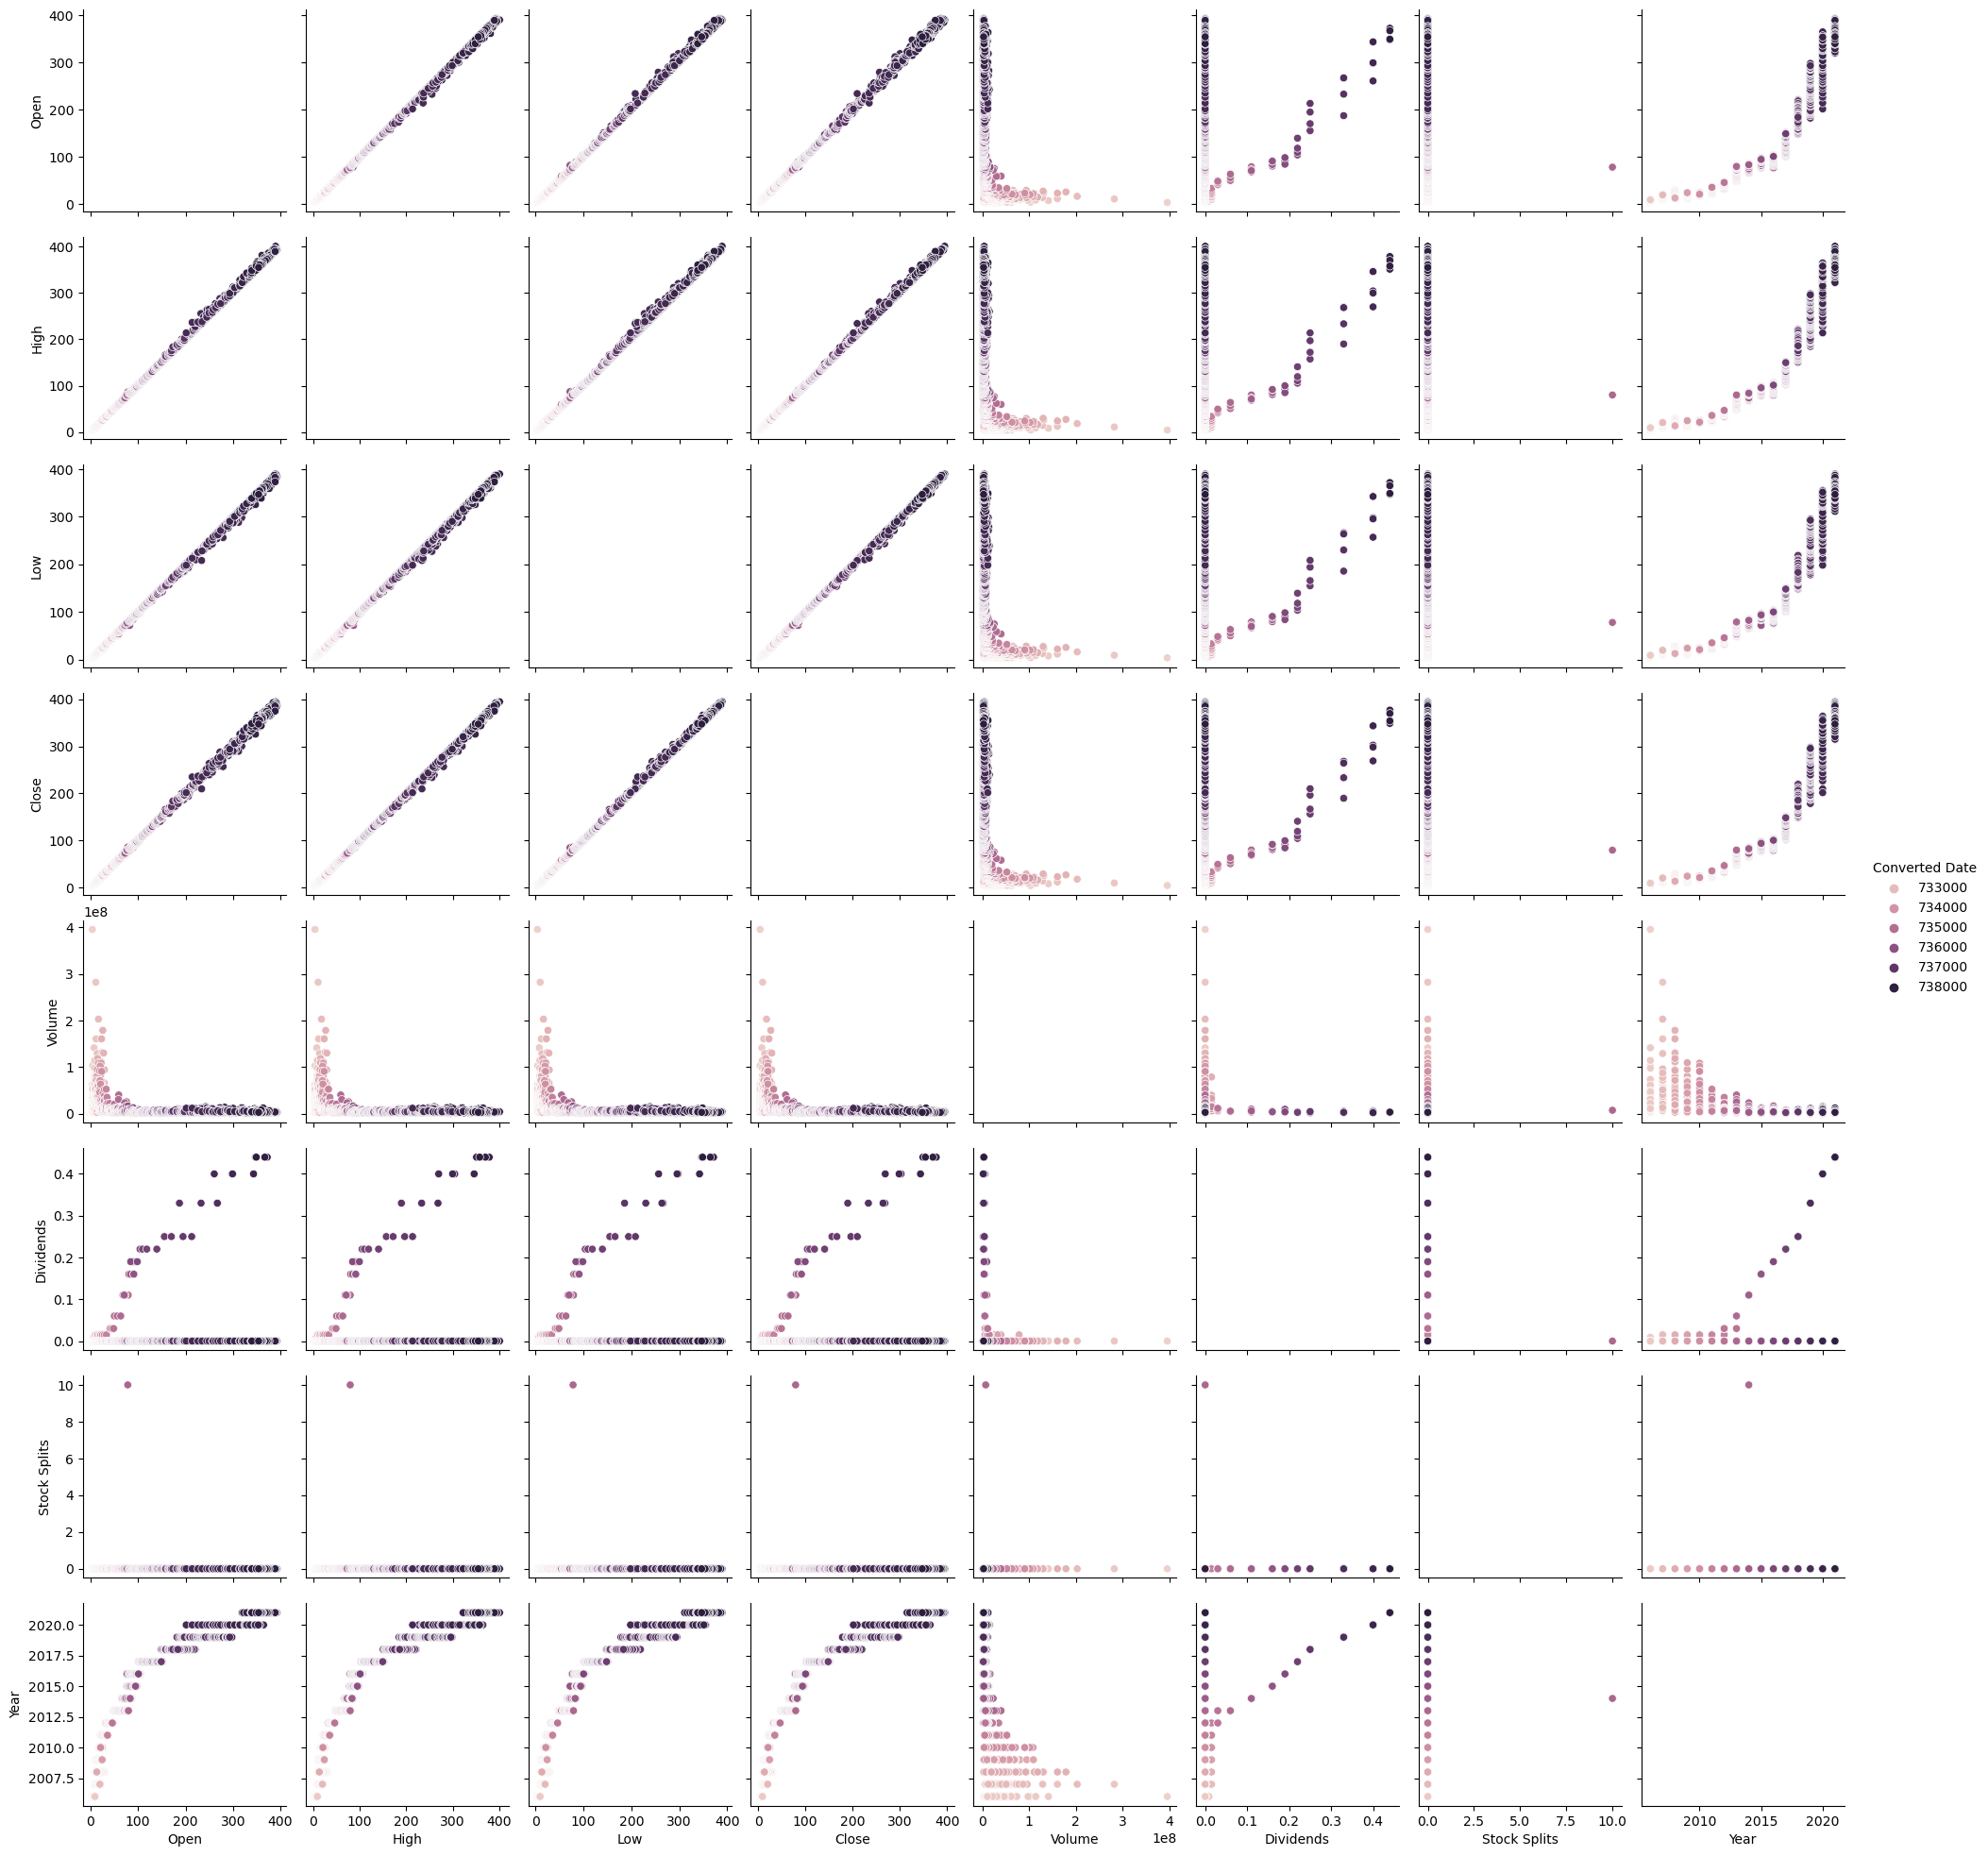

In [2]:
# Pair plot to look at correlations between each variable.
sb.pairplot(stocksDF, hue = 'Converted Date')
plt.show()

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_6052\1861207550.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(stocksDF.corr(), annot = True)


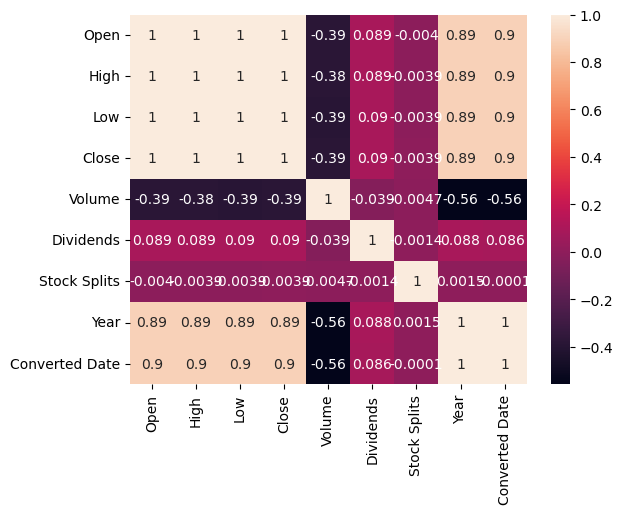

In [3]:
# Heat Map to look at correlations between each variable.
sb.heatmap(stocksDF.corr(), annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [44]:
# x variables (positive correlation): High, Low, Open, Close
xPosVars = stocksDF[['High']]

# x variable (negative correlation): Volume
xNegVar = stocksDF[['Volume']]
                     
# y variables (dependent): Converted Date
yVar = stocksDF['Converted Date']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [45]:
xPosTrain, xPosTest, yPosTrain, yPosTest = tts(xPosVars,yVar, test_size=0.3)
xNegTrain, xNegTest, yNegTrain, yNegTest = tts(xNegVar,yVar,test_size=0.3)

[13.49474998]


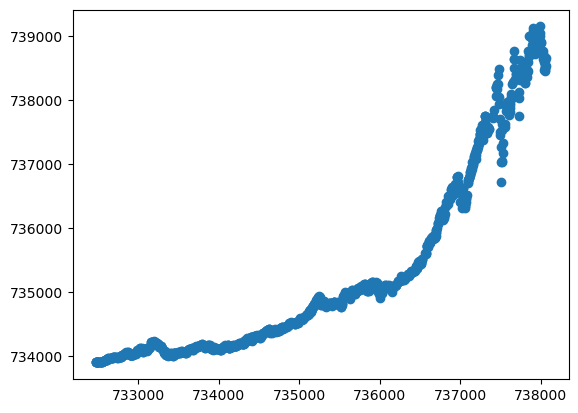

In [46]:
# Creating an Instance of LinearRegression model for positive correlation
lmPos = lr()

# Train/fit on the positive training data
lmPos.fit(xPosTrain,yPosTrain)

print(lmPos.coef_)

# Positive prediction test set.
posPred = lmPos.predict(xPosTest)
plt.scatter(yPosTest,posPred)

[-5.28523316e-05]


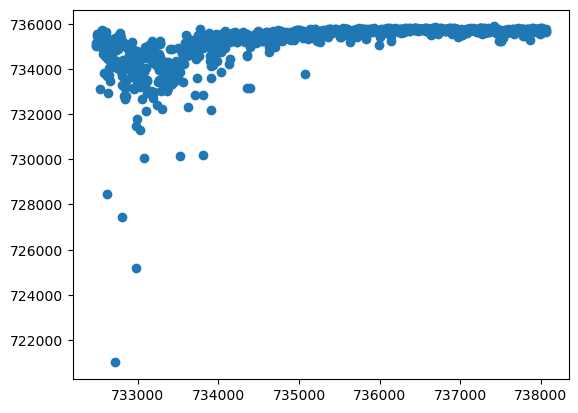

In [47]:
# Creating an instance of LinearRegression model for negative correlation
lmNeg = lr()

# Train/fit on the negative training data
lmNeg.fit(xNegTrain,yNegTrain)

print(lmNeg.coef_)

# Negative prediction test set.
negPred = lmNeg.predict(xNegTest)
plt.scatter(yNegTest,negPred)

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [48]:
# Add constant to positive x variables
xPosVars = sm.add_constant(xPosVars)

# Fit linear regression model
posModel = sm.OLS(yVar, xPosVars).fit()

# View model summary
print(posModel.summary())

                            OLS Regression Results                            
Dep. Variable:         Converted Date   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.566e+04
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:20:32   Log-Likelihood:                -30979.
No. Observations:                3872   AIC:                         6.196e+04
Df Residuals:                    3870   BIC:                         6.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.338e+05     16.311    4.5e+04      0.0

In [49]:
# Add constant to negative x variables
xNegVar = sm.add_constant(xNegVar)

# Fit linear regression model
negModel = sm.OLS(yVar, xNegVar).fit()

# View model summary
print(negModel.summary())

                            OLS Regression Results                            
Dep. Variable:         Converted Date   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1746.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          3.23e-315
Time:                        23:20:39   Log-Likelihood:                -33393.
No. Observations:                3872   AIC:                         6.679e+04
Df Residuals:                    3870   BIC:                         6.680e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.359e+05     26.424   2.78e+04      0.0

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

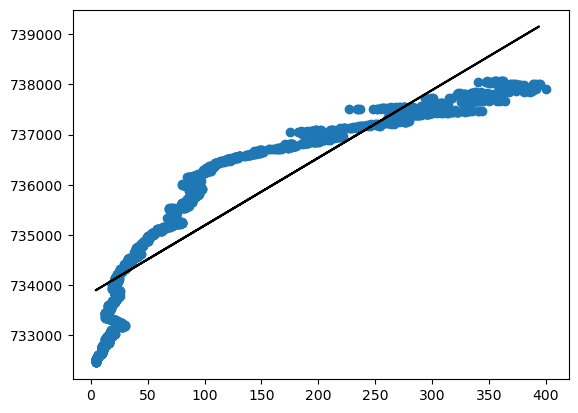

In [51]:
plt.scatter(xPosTrain,yPosTrain)
plt.plot(xPosTest,posPred,color="black")
plt.show()

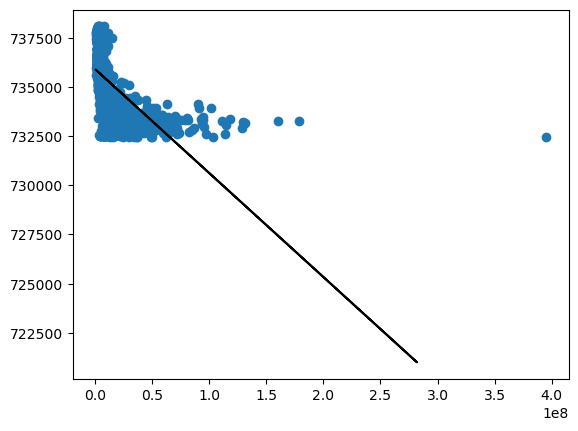

In [52]:
plt.scatter(xNegTrain,yNegTrain)
plt.plot(xNegTest,negPred,color="black")
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [70]:
print("MAE= ", metrics.mean_absolute_error(yPosTest,posPred))
print("MSE= ", metrics.mean_squared_error(yPosTest,posPred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(yPosTest,posPred)))

MAE=  606.5697249173918
MSE=  498810.13552249625
RMSE: 706.2649187964076


Now plot the residuals. Did you get a bell curve?

<function matplotlib.pyplot.show(close=None, block=None)>

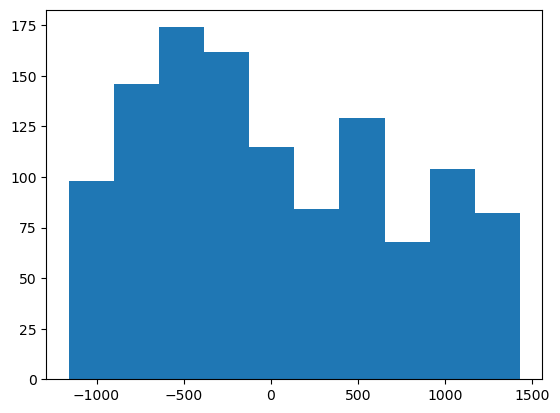

In [77]:
plt.hist(posPred-yPosTest)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

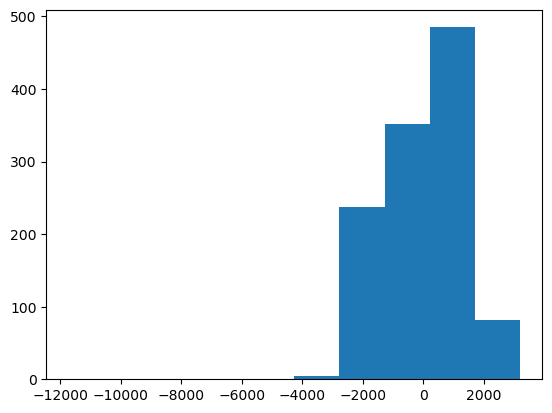

In [78]:
plt.hist(negPred-yNegTest)
plt.show

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
It was above 0.7 for the positively correlated data using High but not the negatively correlated data using Volume.

2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares?
Because the R-squared value was above 0.7, I suppose I would.